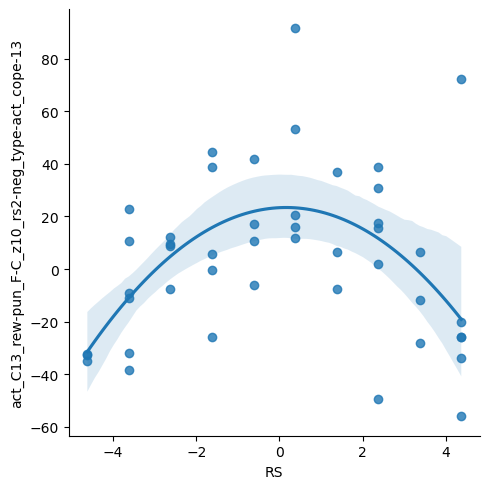

In [1]:
import os
import numpy as np
import pandas as pd
import re
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import AnovaRM
from sklearn.linear_model import LinearRegression
import csv

usedir = 'C:\\Users\\tup54227\\Documents\\GitHub\\istart-sharedreward\\derivatives'
os.chdir(usedir)

df = pd.read_excel("ppi_wholebrain_scatterplot.xls")

fig=sns.lmplot(y="act_C13_rew-pun_F-C_z10_rs2-neg_type-act_cope-13",x="RS", data=df, order=2)

SR_flist=[os.path.join(root, f) for root, dirs, files in os.walk('logs') for f in files if 'SR-Rating' in f]

In [2]:
ASRD = pd.read_csv('C:/Users/tup54227/Documents/GitHub/istart/Shared_Reward/Behavioral_Analysis/Data_Out/AllSharedRewardData.csv')
APD = pd.read_excel('ISTART-ALL-Combined-042122.xlsx')
keepios = [col for col in APD.columns if col.startswith('ios') or col.startswith('sub')]
keepwinlose = [col for col in ASRD.columns if col.startswith('Win') or col.startswith('Lose') or col.startswith('sub')]
df = pd.merge(df, APD[keepios], on = 'sub', how = 'right')
df = pd.merge(df,ASRD[keepwinlose],on='sub', how='right')

df = df.dropna(subset=['Subject']).drop_duplicates(subset=['sub'])

df = df.replace(999, np.NaN)
df['ios_diff_computer'] = df['ios_p'] - df['ios_computer'] #ios_p was participant rating of frend, ios_fu was participant rating of stranger in follow-up. ios_f was FRIEND rating of participant
df['ios_diff_stranger'] = df['ios_p'] - df['ios_fu_score']
df['Win_F_C'] = df['Win-Friend'] - df['Win-Comp']
df['Win_F_S'] = df['Win-Friend'] - df['Win-Stranger']
df_ios = df.dropna(subset=['ios_diff_computer'])
df_psr = df.dropna(subset = ['Win_F_S'])
df_both = df_psr.dropna(subset=['ios_diff_computer'])

pd.set_option('display.max_columns', None)
df

,Subject,Ones,SU,RS,RS_square,SUxRS,SUxRS_sq,tsnr,fd_mean,ppi_c9_F-C_sub-neg_type-ppi_seed-VS_thr5_cope-09,ppi_C10_FS-C_z8_sub-neg_cluster1_type-ppi_seed-VS_thr5_cope-10,ppi_C10_FS-C_z8_sub-neg_cluster2_type-ppi_seed-VS_thr5_cope-10,ppi_C13_rew-pun_F-C_z1_main-effect_type-ppi_seed-VS_thr5_cope-13,ppi_C13_rew-pun_F-C_z12_su-rs2-neg_cluster1_type-ppi_seed-VS_thr5_cope-13,ppi_C16_rew_F-C_z1_main-effect_cluster1_type-ppi_seed-VS_thr5_cope-16,ppi_C16_rew_F-C_z1_main-effect_cluster2_type-ppi_seed-VS_thr5_cope-16,ppi_C21_rew_F-SC_z1_main-effect_type-ppi_seed-VS_thr5_cope-21,ppi_C23_rew-pun_F-SC_z12_su-rs2-neg_cluster1_type-ppi_seed-VS_thr5_cope-23,Unnamed: 18,act_C13_rew-pun_F-C_z9_rs-neg_cluster1_type-act_cope-13,act_C13_rew-pun_F-C_z9_rs-neg_cluster2_type-act_cope-13,act_C13_rew-pun_F-C_z10_rs2-neg_type-act_cope-13,act_C14_rew_F-S_z2_sub_type-act_cope-14,act_C16_rew_F-C_z2_sub_cluster1_type-act_cope-16,act_C16_rew_F-C_z2_sub_cluster2_type-act_cope-16,act_C16_rew_F-C_z2_sub_cluster3_type-act_cope-16,Unnamed: 26,aTPJ_VS_ppi_cope_01,aTPJ_VS_ppi_cope_02,aTPJ_VS_ppi_cope_03,aTPJ_VS_ppi_cope_04,aTPJ_VS_ppi_cope_05,aTPJ_VS_ppi_cope_06,pTPJ_VS_ppi_cope_01,pTPJ_VS_ppi_cope_02,pTPJ_VS_ppi_cope_03,pTPJ_VS_ppi_cope_04,pTPJ_VS_ppi_cope_05,pTPJ_VS_ppi_cope_06,Unnamed: 39,sub,ios_fu_score,ios_computer,ios_f,ios_p,Win-Friend,Win-Stranger,Win-Comp,Lose-Friend,Lose-Stranger,Lose-Comp,ios_diff_computer,ios_diff_stranger,Win_F_C,Win_F_S
0,1001.0,1.0,0.479686,-0.622222,-7.936790,-0.637264,2.960326,-0.568018,-0.344076,0.257997,0.375157,0.375157,-0.023776,0.055897,0.043499,0.078306,0.070878,-0.255516,NaN,-8.897129,13.637379,41.681642,42.253260,65.702165,7.122439,7.023092,NaN,-0.124334,-0.129312,-0.011946,-0.156321,-0.057591,-0.019649,-0.015173,-0.410006,-0.080410,-0.212520,-0.012790,-0.204635,NaN,1001,1.0,1.0,5,5,5,-2,5,5,0,4,4.0,4.0,0,7
2,1006.0,1.0,-1.131845,-0.622222,-7.936790,0.365466,2.336405,1.028158,-0.873651,0.297450,0.203178,0.203178,0.148530,-0.553190,0.048455,0.253124,0.390924,0.072858,NaN,30.251268,23.831967,16.998754,-7.474041,-0.526911,5.429469,17.678105,NaN,-0.027773,0.109658,-0.031841,-0.067696,-0.015802,-0.001288,0.100421,0.061524,-0.062508,0.130512,0.014450,0.094393,NaN,1006,2.0,2.0,4,5,3,2,5,-4,-1,-2,3.0,3.0,-2,1
5,1009.0,1.0,-1.131845,0.377778,-8.181235,-0.766379,2.613079,1.370494,-0.301386,0.042417,0.182616,0.182616,0.239714,-0.081801,0.050043,0.040188,0.026646,0.490375,NaN,6.595074,-9.533180,15.810334,-17.603033,-29.907103,-9.650790,16.099039,NaN,-0.104572,0.070416,0.049526,0.185446,0.097494,0.207775,-0.199587,0.108495,-0.064522,-0.003135,-0.154966,0.083374,NaN,1009,2.0,1.0,5,6,5,4,4,-5,-4,-4,5.0,4.0,1,1
6,1010.0,1.0,3.190376,-1.622222,-5.692346,-5.514293,11.170422,-0.991437,0.558449,-0.320931,-0.771705,-0.771705,0.365152,0.310482,0.266391,0.314331,0.787606,0.549525,NaN,17.901311,5.852669,-0.372075,55.805235,50.540134,6.244366,38.020551,NaN,-0.013869,-0.257590,-0.403182,-0.025067,-0.155147,-0.350274,-0.120598,-0.173152,-0.481878,0.118195,-0.100709,-0.396719,NaN,1010,NaN,NaN,6,6,1,-2,-5,2,-3,-5,NaN,NaN,6,3
7,1011.0,1.0,-1.416233,2.377778,-2.670123,-3.706279,-5.232523,-1.678332,1.498732,0.145049,0.365831,0.365831,0.092184,0.100279,0.175593,0.219936,0.189737,0.867485,NaN,2.925382,-3.930550,-49.534258,-28.170113,-91.601465,-36.733455,-4.753485,NaN,0.108296,0.070321,-0.022086,0.151899,-0.113821,-0.087979,0.013179,0.109955,-0.047087,0.126304,-0.153662,-0.136274,NaN,1011,NaN,NaN,7,5,5,5,2,-5,-5,-5,NaN,NaN,3,0
8,1012.0,1.0,-1.416233,-4.622222,13.040988,6.207349,-27.483110,1.848663,-0.503759,-0.013332,0.009177,0.009177,0.378428,0.155933,0.043638,0.353492,0.486492,0.422158,NaN,11.327013,13.066474,-32.424188,16.102053,26.131065,9.599253,14.623979,NaN,-0.006942,-0.109545,-0.141067,-0.092513,-0.037642,-0.145984,-0.051203,-0.048563,-0.097379,0.092220,0.016928,-0.106217,NaN,1012,2.0,1.0,5,5,3,0,0,-3,0,0,4.0,3.0,3,3
9,1013.0,1.0,-0.784260,4.377778,10.840988,-3.772108,-12.255679,1.641652,-1.226546,-0.378109,-0.605608,-0.605608,0.455745,0.311818,0.11

In [6]:
#Failed attempt to automate reading in of extracted ROIs

# position = ['a','p']
# cope = [1,2,3,4,5,6]
# for p in position:
#     for cnum in cope:
#         df['%sTPJ_VS_ppi_cope-0%d' % (p, cnum)] = np.loadtxt('imaging_plots/resampled_%sTPJ-thr50-2mm_type-ppi_seed-VS_thr5_cope-0%d.txt' % (p, cnum)))

df['aTPJ_R-P_F-C'] = (df['aTPJ_VS_ppi_cope_04'] - df['aTPJ_VS_ppi_cope_03']) - (df['aTPJ_VS_ppi_cope_02'] - df['aTPJ_VS_ppi_cope_01'])
df['aTPJ_R-P_F-S'] = (df['aTPJ_VS_ppi_cope_04'] - df['aTPJ_VS_ppi_cope_03']) - (df['aTPJ_VS_ppi_cope_06'] - df['aTPJ_VS_ppi_cope_05'])
df['pTPJ_R-P_F-C'] = (df['pTPJ_VS_ppi_cope_04'] - df['pTPJ_VS_ppi_cope_03']) - (df['pTPJ_VS_ppi_cope_02'] - df['pTPJ_VS_ppi_cope_01'])
df['pTPJ_R-P_F-S'] = (df['pTPJ_VS_ppi_cope_04'] - df['pTPJ_VS_ppi_cope_03']) - (df['pTPJ_VS_ppi_cope_06'] - df['pTPJ_VS_ppi_cope_05'])
df

,Subject,Ones,SU,RS,RS_square,SUxRS,SUxRS_sq,tsnr,fd_mean,ppi_c9_F-C_sub-neg_type-ppi_seed-VS_thr5_cope-09,ppi_C10_FS-C_z8_sub-neg_cluster1_type-ppi_seed-VS_thr5_cope-10,ppi_C10_FS-C_z8_sub-neg_cluster2_type-ppi_seed-VS_thr5_cope-10,ppi_C13_rew-pun_F-C_z1_main-effect_type-ppi_seed-VS_thr5_cope-13,ppi_C13_rew-pun_F-C_z12_su-rs2-neg_cluster1_type-ppi_seed-VS_thr5_cope-13,ppi_C16_rew_F-C_z1_main-effect_cluster1_type-ppi_seed-VS_thr5_cope-16,ppi_C16_rew_F-C_z1_main-effect_cluster2_type-ppi_seed-VS_thr5_cope-16,ppi_C21_rew_F-SC_z1_main-effect_type-ppi_seed-VS_thr5_cope-21,ppi_C23_rew-pun_F-SC_z12_su-rs2-neg_cluster1_type-ppi_seed-VS_thr5_cope-23,Unnamed: 18,act_C13_rew-pun_F-C_z9_rs-neg_cluster1_type-act_cope-13,act_C13_rew-pun_F-C_z9_rs-neg_cluster2_type-act_cope-13,act_C13_rew-pun_F-C_z10_rs2-neg_type-act_cope-13,act_C14_rew_F-S_z2_sub_type-act_cope-14,act_C16_rew_F-C_z2_sub_cluster1_type-act_cope-16,act_C16_rew_F-C_z2_sub_cluster2_type-act_cope-16,act_C16_rew_F-C_z2_sub_cluster3_type-act_cope-16,Unnamed: 26,aTPJ_VS_ppi_cope_01,aTPJ_VS_ppi_cope_02,aTPJ_VS_ppi_cope_03,aTPJ_VS_ppi_cope_04,aTPJ_VS_ppi_cope_05,aTPJ_VS_ppi_cope_06,pTPJ_VS_ppi_cope_01,pTPJ_VS_ppi_cope_02,pTPJ_VS_ppi_cope_03,pTPJ_VS_ppi_cope_04,pTPJ_VS_ppi_cope_05,pTPJ_VS_ppi_cope_06,Unnamed: 39,sub,ios_fu_score,ios_computer,ios_f,ios_p,Win-Friend,Win-Stranger,Win-Comp,Lose-Friend,Lose-Stranger,Lose-Comp,ios_diff_computer,ios_diff_stranger,Win_F_C,Win_F_S,aTPJ_R-P_F-C,aTPJ_R-P_F-S,pTPJ_R-P_F-C,pTPJ_R-P_F-S
0,1001.0,1.0,0.479686,-0.622222,-7.936790,-0.637264,2.960326,-0.568018,-0.344076,0.257997,0.375157,0.375157,-0.023776,0.055897,0.043499,0.078306,0.070878,-0.255516,NaN,-8.897129,13.637379,41.681642,42.253260,65.702165,7.122439,7.023092,NaN,-0.124334,-0.129312,-0.011946,-0.156321,-0.057591,-0.019649,-0.015173,-0.410006,-0.080410,-0.212520,-0.012790,-0.204635,NaN,1001,1.0,1.0,5,5,5,-2,5,5,0,4,4.0,4.0,0,7,-0.139397,-0.182317,0.262723,0.059736
2,1006.0,1.0,-1.131845,-0.622222,-7.936790,0.365466,2.336405,1.028158,-0.873651,0.297450,0.203178,0.203178,0.148530,-0.553190,0.048455,0.253124,0.390924,0.072858,NaN,30.251268,23.831967,16.998754,-7.474041,-0.526911,5.429469,17.678105,NaN,-0.027773,0.109658,-0.031841,-0.067696,-0.015802,-0.001288,0.100421,0.061524,-0.062508,0.130512,0.014450,0.094393,NaN,1006,2.0,2.0,4,5,3,2,5,-4,-1,-2,3.0,3.0,-2,1,-0.173286,-0.050369,0.231917,0.113078
5,1009.0,1.0,-1.131845,0.377778,-8.181235,-0.766379,2.613079,1.370494,-0.301386,0.042417,0.182616,0.182616,0.239714,-0.081801,0.050043,0.040188,0.026646,0.490375,NaN,6.595074,-9.533180,15.810334,-17.603033,-29.907103,-9.650790,16.099039,NaN,-0.104572,0.070416,0.049526,0.185446,0.097494,0.207775,-0.199587,0.108495,-0.064522,-0.003135,-0.154966,0.083374,NaN,1009,2.0,1.0,5,6,5,4,4,-5,-4,-4,5.0,4.0,1,1,-0.039068,0.025640,-0.246696,-0.176953
6,1010.0,1.0,3.190376,-1.622222,-5.692346,-5.514293,11.170422,-0.991437,0.558449,-0.320931,-0.771705,-0.771705,0.365152,0.310482,0.266391,0.314331,0.787606,0.549525,NaN,17.901311,5.852669,-0.372075,55.805235,50.540134,6.244366,38.020551,NaN,-0.013869,-0.257590,-0.403182,-0.025067,-0.155147,-0.350274,-0.120598,-0.173152,-0.481878,0.118195,-0.100709,-0.396719,NaN,1010,NaN,NaN,6,6,1,-2,-5,2,-3,-5,NaN,NaN,6,3,0.621836,0.573241,0.652627,0.896084
7,1011.0,1.0,-1.416233,2.377778,-2.670123,-3.706279,-5.232523,-1.678332,1.498732,0.145049,0.365831,0.365831,0.092184,0.100279,0.175593,0.219936,0.189737,0.867485,NaN,2.925382,-3.930550,-49.534258,-28.170113,-91.601465,-36.733455,-4.753485,NaN,0.108296,0.070321,-0.022086,0.151899,-0.113821,-0.087979,0.013179,0.109955,-0.047087,0.126304,-0.153662,-0.136274,NaN,1011,NaN,NaN,7,5,5,5,2,-5,-5,-5,NaN,NaN,3,0,0.211960,0.148143,0.076615,0.156002
8,1012.0,1.0,-1.416233,-4.622222,13.040988,6.207349,-27.483110,1.848663,-0.503759,-0.013332,0.009177,0.009177,0.378428,0.155933,0.043638,0.353492,0.486492,0.422158,NaN,11.327013,13.066474,-32.424188,16.102053,26.131065,9.599253,14.623979,NaN,-0.006942,-0.109545,-0.141067,-0.092513,-0.037642,-0.145984

,Subject,Ones,SU,RS,RS_square,SUxRS,SUxRS_sq,tsnr,fd_mean,ppi_c9_F-C_sub-neg_type-ppi_seed-VS_thr5_cope-09,ppi_C10_FS-C_z8_sub-neg_cluster1_type-ppi_seed-VS_thr5_cope-10,ppi_C10_FS-C_z8_sub-neg_cluster2_type-ppi_seed-VS_thr5_cope-10,ppi_C13_rew-pun_F-C_z1_main-effect_type-ppi_seed-VS_thr5_cope-13,ppi_C13_rew-pun_F-C_z12_su-rs2-neg_cluster1_type-ppi_seed-VS_thr5_cope-13,ppi_C16_rew_F-C_z1_main-effect_cluster1_type-ppi_seed-VS_thr5_cope-16,ppi_C16_rew_F-C_z1_main-effect_cluster2_type-ppi_seed-VS_thr5_cope-16,ppi_C21_rew_F-SC_z1_main-effect_type-ppi_seed-VS_thr5_cope-21,ppi_C23_rew-pun_F-SC_z12_su-rs2-neg_cluster1_type-ppi_seed-VS_thr5_cope-23,Unnamed: 18,act_C13_rew-pun_F-C_z9_rs-neg_cluster1_type-act_cope-13,act_C13_rew-pun_F-C_z9_rs-neg_cluster2_type-act_cope-13,act_C13_rew-pun_F-C_z10_rs2-neg_type-act_cope-13,act_C14_rew_F-S_z2_sub_type-act_cope-14,act_C16_rew_F-C_z2_sub_cluster1_type-act_cope-16,act_C16_rew_F-C_z2_sub_cluster2_type-act_cope-16,act_C16_rew_F-C_z2_sub_cluster3_type-act_cope-16,Unnamed: 26,aTPJ_VS_ppi_cope_01,aTPJ_VS_ppi_cope_02,aTPJ_VS_ppi_cope_03,aTPJ_VS_ppi_cope_04,aTPJ_VS_ppi_cope_05,aTPJ_VS_ppi_cope_06,pTPJ_VS_ppi_cope_01,pTPJ_VS_ppi_cope_02,pTPJ_VS_ppi_cope_03,pTPJ_VS_ppi_cope_04,pTPJ_VS_ppi_cope_05,pTPJ_VS_ppi_cope_06,Unnamed: 39,sub,ios_fu_score,ios_computer,ios_f,ios_p,Win-Friend,Win-Stranger,Win-Comp,Lose-Friend,Lose-Stranger,Lose-Comp,ios_diff_computer,ios_diff_stranger,Win_F_C,Win_F_S,aTPJ_R-P_F-C,aTPJ_R-P_F-S,pTPJ_R-P_F-C,pTPJ_R-P_F-S
Subject,1.000000,NaN,0.059023,-0.020049,0.028499,0.027630,-0.233061,-0.175584,0.071150,-0.278595,-0.221515,-0.221515,-0.351467,0.335185,-0.031101,-0.233691,-0.247445,0.112708,NaN,-0.005561,0.053409,0.016293,-0.020196,0.088241,0.015081,0.065662,NaN,0.158307,-0.046685,0.086884,0.070752,0.232402,0.259614,-0.016566,0.042611,0.090527,0.068186,0.127604,0.245264,NaN,1.000000,0.228916,0.476497,-0.103298,0.243484,0.210677,0.018209,-0.064223,-0.258335,-0.112806,0.029783,-0.191987,-0.002097,0.186296,0.140259,0.085206,-0.051118,-0.054382,-0.106796
Ones,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SU,0.059023,NaN,1.000000,0.071203,-0.212376,-0.100369,0.583431,-0.370493,0.202375,-0.587064,-0.595797,-0.595797,0.118240,0.323115,0.404644,0.019618,0.137068,0.128973,NaN,-0.201679,-0.052607,0.194897,0.527292,0.458348,0.584399,0.638835,NaN,0.117520,-0.149890,-0.214941,0.108666,0.075418,-0.230724,-0.156206,-0.022716,-0.186629,0.113556,0.087805,-0.234170,NaN,0.059023,0.186976,0.105156,-0.034505,0.085801,0.015867,-0.010748,0.084644,0.039529,-0.169375,-0.113603,-0.119263,-0.162647,-0.067863,0.022617,0.323195,0.386402,0.086192,0.348234
RS,-0.020049,NaN,0.071203,1.000000,0.049230,-0.300433,0.289725,-0.261204,0.125173,-0.132303,-0.101688,-0.101688,0.085594,-0.011852,0.376408,0.330127,0.248887,0.068571,NaN,-0.312121,-0.413611,0.055768,-0.128487,-0.166227,-0.125509,-0.073548,NaN,0.272980,0.239357,0.105067,0.381893,-0.031625,0.113993,0.202917,0.205817,0.034400,0.154832,-0.197447,-0.096912,NaN,-0.020049,0.230840,0.148684,-0.026983,-0.085486,0.197580,-0.016938,-0.195406,-0.094662,-0.158537,-0.101096,-0.131196,-0.172923,0.298429,0.165371,0.148725,0.065385,0.041053,0.023441
RS_square,0.028499,NaN,-0.212376,0.049230,1.000000,0.307800,-0.197134,0.351501,-0.132321,0.123562,0.062730,0.062730,0.100860,-0.059214,0.028961,0.065228,-0.046139,-0.197860,NaN,-0.129435,-0.166676,-0.554669,0.009277,0.000682,-0.096898,-0.286840,NaN,0.110519,-0.139539,0.109103,0.095089,-0.165024,-0.006771,-0.058261,-0.247306,0.012788,-0.062710,-0.283721,0.037374,NaN,0.028499,0.109662,0.022328,0.100791,0.101499,0.205017,0.018112,-0.184842,-0.130860,0.277104,0.127697,0.027459,-0.032164,0.293262,0.136102,0.106157,-0.102268,0.077822,-0.188831
SUxRS,0.027630,NaN,-0.100369,-0.300433,0.307800,1.000000,-0.286514,0.195469,-0.147710,0.080190,0.096694,0.096

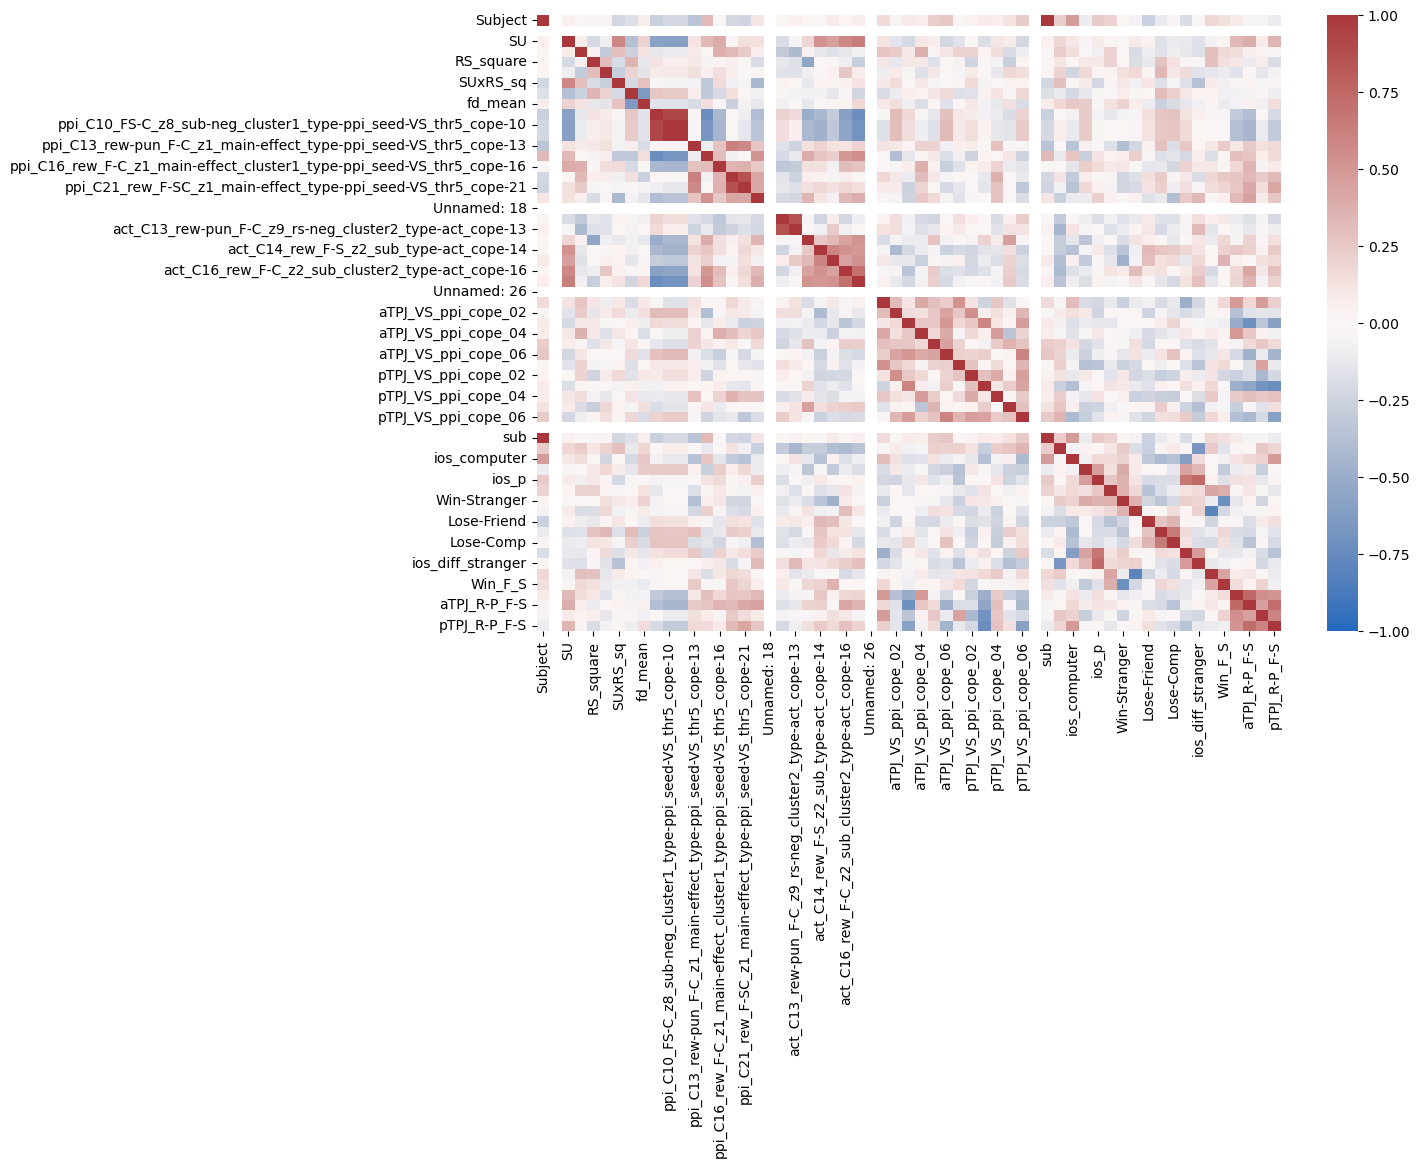

43

In [7]:
df 

cormat=df.corr()
display(cormat)
fig = plt.figure(figsize=(12, 8))
sns.heatmap(cormat,cmap='vlag',vmin=-1)
plt.show()

len(df['pTPJ_R-P_F-S'].unique())

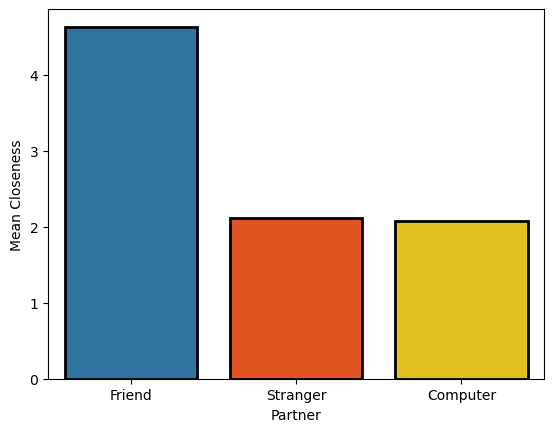

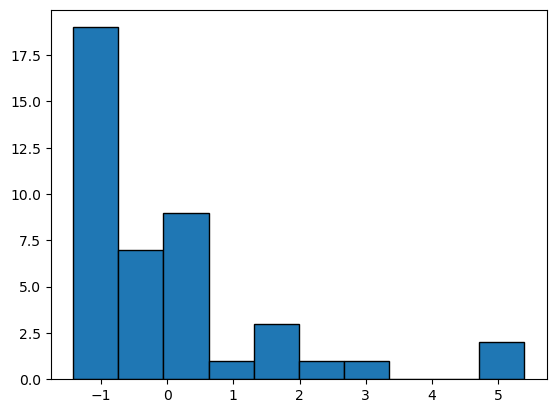

		   Individual Differences - Substance Use



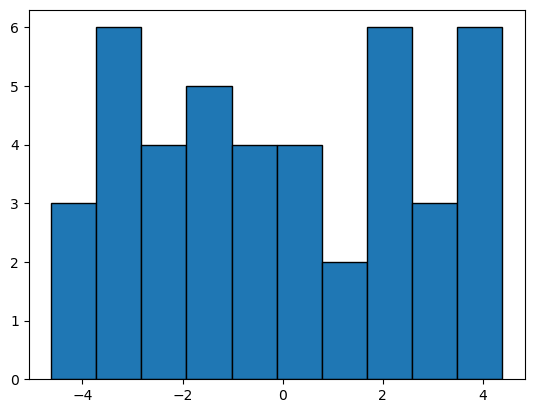

		   Individual Differences - Reward Sensitivity



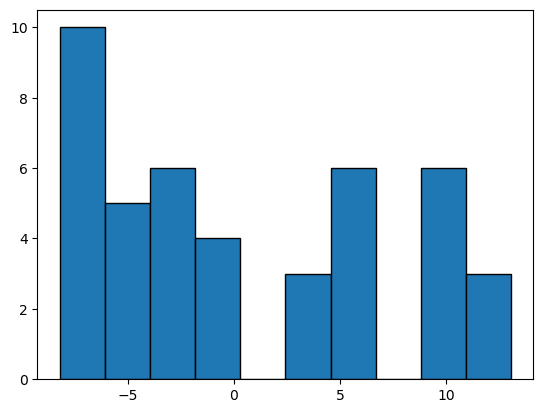

		   Individual Differences - Reward Sensitivity Squared



In [14]:
ios_means = pd.DataFrame({
    'Partner': ['Friend', 'Stranger', 'Computer'],
    'Mean Closeness': [df_ios['ios_p'].mean(),df_ios['ios_fu_score'].mean(),df_ios['ios_computer'].mean()]})
fig_closeness = sns.barplot(x = 'Partner', y = 'Mean Closeness', data=ios_means, palette=['tab:blue','orangered','gold'], edgecolor='black', linewidth=2)


plt.show()

plt.hist(df['SU'], edgecolor='k')
plt.show()
print('\t\t   Individual Differences - Substance Use\n')

plt.hist(df['RS'], edgecolor='k')
plt.show()
print('\t\t   Individual Differences - Reward Sensitivity\n')

plt.hist(df['RS_square'], edgecolor='k')
plt.show()
print('\t\t   Individual Differences - Reward Sensitivity Squared\n')

Reward Sensitivity correlation with VS to FFA connectivity when winning with Friend v Computer 
r: 0.376407894221061 ; p: 0.012853947056366688


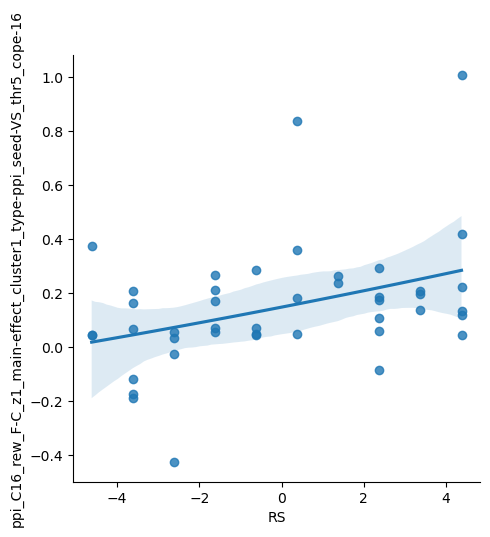

<class 'seaborn.axisgrid.FacetGrid'>
Substance Use correlation with VS to FFA connectivity when winning with Friend v Computer 
r: 0.40464432228678837 ; p: 0.0071147230627498365


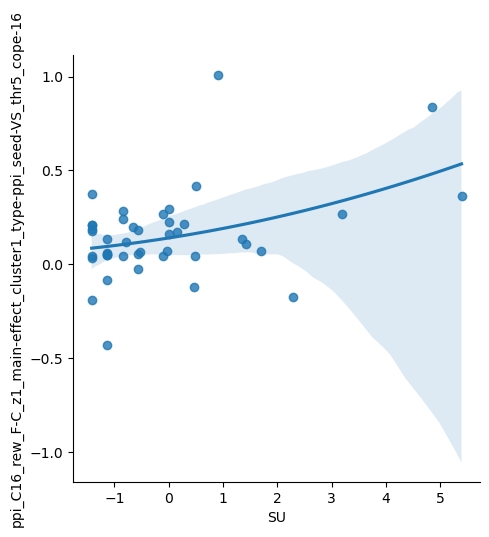

<class 'seaborn.axisgrid.FacetGrid'>
RS*SU correlation with VS to FFA connectivity when winning with Friend v Computer 
r: 0.14212191157929568 ; p: 0.3632866079519031


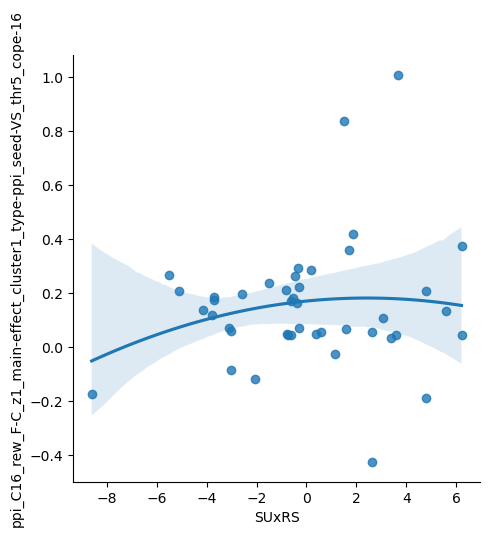

<class 'seaborn.axisgrid.FacetGrid'>


In [23]:
r,p = stats.pearsonr(df['ppi_C16_rew_F-C_z1_main-effect_cluster1_type-ppi_seed-VS_thr5_cope-16'], df['RS'])
print("Reward Sensitivity correlation with VS to FFA connectivity when winning with Friend v Computer \nr: %s ; p: %s" %(r,p))
fig=sns.lmplot(y="ppi_C16_rew_F-C_z1_main-effect_cluster1_type-ppi_seed-VS_thr5_cope-16",x="RS", data=df, order=2)
plt.show()
print(type(fig))

r,p = stats.pearsonr(df['ppi_C16_rew_F-C_z1_main-effect_cluster1_type-ppi_seed-VS_thr5_cope-16'], df['SU'])
print("Substance Use correlation with VS to FFA connectivity when winning with Friend v Computer \nr: %s ; p: %s" %(r,p))
fig=sns.lmplot(y="ppi_C16_rew_F-C_z1_main-effect_cluster1_type-ppi_seed-VS_thr5_cope-16",x="SU", data=df, order=2)
plt.show()
print(type(fig))

r,p = stats.pearsonr(df['ppi_C16_rew_F-C_z1_main-effect_cluster1_type-ppi_seed-VS_thr5_cope-16'], df['SUxRS'])
print("RS*SU correlation with VS to FFA connectivity when winning with Friend v Computer \nr: %s ; p: %s" %(r,p))
fig=sns.lmplot(y="ppi_C16_rew_F-C_z1_main-effect_cluster1_type-ppi_seed-VS_thr5_cope-16",x="SUxRS", data=df, order=2)
plt.show()
print(type(fig))

Substance Use correlation with VS to aTPJ connectivity when winning vs losing with Friend v Stranger 
r: 0.38640185250857606 ; p: 0.010485060182113952


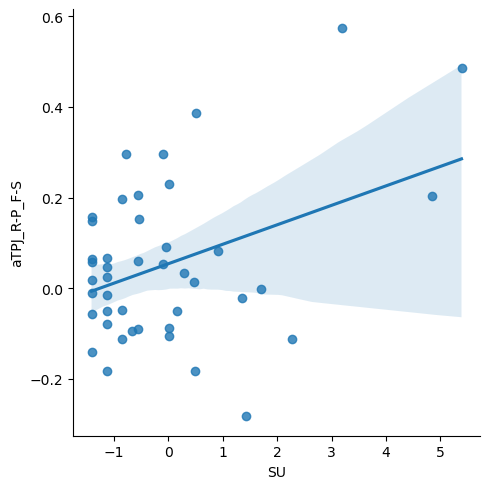

<class 'seaborn.axisgrid.FacetGrid'>
Substance Use correlation with VS to pTPJ connectivity when winning vs losing with Friend v Stranger 
r: 0.3482342798484855 ; p: 0.02211512993718842


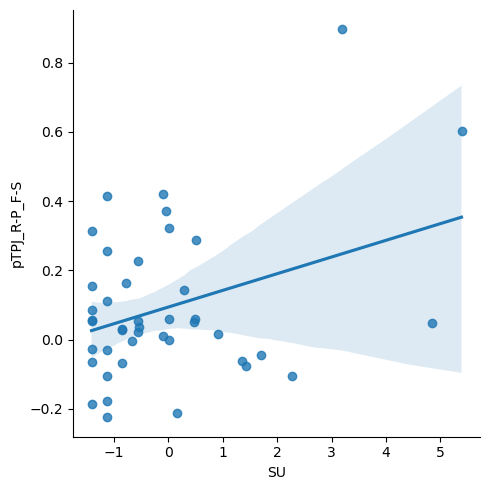

<class 'seaborn.axisgrid.FacetGrid'>


In [43]:
r,p = stats.pearsonr(df['aTPJ_R-P_F-S'], df['SU'])
print("Substance Use correlation with VS to aTPJ connectivity when winning vs losing with Friend v Stranger \nr: %s ; p: %s" %(r,p))
fig=sns.lmplot(y="aTPJ_R-P_F-S",x="SU", data=df, order=1)
plt.show()
print(type(fig))

r,p = stats.pearsonr(df['pTPJ_R-P_F-S'], df['SU'])
print("Substance Use correlation with VS to pTPJ connectivity when winning vs losing with Friend v Stranger \nr: %s ; p: %s" %(r,p))
fig=sns.lmplot(y="pTPJ_R-P_F-S",x="SU", data=df, order=1)
plt.show()
print(type(fig))


In [ ]:
df = df.replace(999, np.NaN)
df['ios_diff'] = df['ios_p'] - df['ios_fu_score'] #ios_p was participant rating of frend, ios_fu was participant rating of stranger in follow-up. ios_f was FRIEND rating of participant
df['Win_F_C'] = df['Win-Friend'] - df['Win-Comp']
df['Win_F_S'] = df['Win-Friend'] - df['Win-Stranger']
df_ios = df.dropna(subset=['ios_diff'])
df_psr = df.dropna(subset = ['Win_F_S'])
df_both = df_psr.dropna(subset=['ios_diff'])

r,p = stats.pearsonr(df_both['Win_F_S'], df_both['ios_diff'])
print("Difference b/w friend and stranger for: Post-Scan Ratings vs Closeness -  r: %s ; p: %s" %(r,p))

r,p = stats.pearsonr(df_ios['act_C14_rew_F-S_z2_sub_type-act_cope-14'], df_ios['ios_diff'])
print("\n\nDifference b/w friend and stranger for: Post-Scan Ratings vs TPJ activation -  r: %s ; p: %s" %(r,p))

g=sns.lmplot(x='ios_diff',y='act_C14_rew_F-S_z2_sub_type-act_cope-14',data=df_ios, x_jitter=.1,y_jitter=.1)
plt.show()
print(type(g))

r,p = stats.pearsonr(df_psr['Win_F_S'], df_psr['act_C14_rew_F-S_z2_sub_type-act_cope-14'])
print("\n\nDifference b/w friend and stranger for: Closeness rating vs TPJ activation -  r: %s ; p: %s" %(r,p))

g=sns.lmplot(x='Win_F_S',y='act_C14_rew_F-S_z2_sub_type-act_cope-14',data=df_psr, x_jitter=.1,y_jitter=.1)
plt.show()
print(type(g))

In [9]:
os.chdir('C:/Users/tup54227/Documents/GitHub/istart/Shared_Reward')
#Make a list of all the SR Files
SR_flist=[os.path.join(root, f) for root, dirs, files in os.walk('logs') for f in files if 'SR-Rating' in f]

#Make a list of Dataframes
ratings_list=[]
for f in SR_flist:
    sub=re.search('sub(.*)_',f).group(1)
    if any(i.isdigit() for i in sub):
        tmp_df=pd.read_csv(f)
        tmp_df['sub']=sub
        if len(tmp_df)==6:
            ratings_list.append(tmp_df)
#Concatonate the DataFrames together
srpr_df=pd.concat(ratings_list)
srpr_df=srpr_df.reset_index(drop=True)
#srpr_df['Rating'].astype(float)


#sort by Trait, then Partner
#srpr_df.groupby(by = ['sub','Partner','Trait']).mean()
srpr_df

,TrialNumber,Partner,Trait,ran,order,Rating,sub
0,1,3,0,1.0,0.0,5.0,1001
1,2,2,0,1.0,1.0,-2.0,1001
2,3,1,0,1.0,2.0,5.0,1001
3,4,3,1,1.0,3.0,5.0,1001
4,5,2,1,1.0,4.0,0.0,1001
...,...,...,...,...,...,...,...
271,2,2,0,1.0,1.0,5.0,3218
272,3,1,0,1.0,2.0,5.0,3218
273,4,3,1,1.0,3.0,-5.0,3218
274,5,2,1,1.0,4.0,-5.0,3218


In [10]:

srpr_anova = AnovaRM(srpr_df, 'Rating', 'sub', within=['Partner', 'Trait'])
srpr_results = srpr_anova.fit()

print(srpr_results)

                   Anova
              F Value Num DF  Den DF Pr > F
-------------------------------------------
Partner        5.9129 2.0000 90.0000 0.0039
Trait         87.1510 1.0000 45.0000 0.0000
Partner:Trait 42.7185 2.0000 90.0000 0.0000



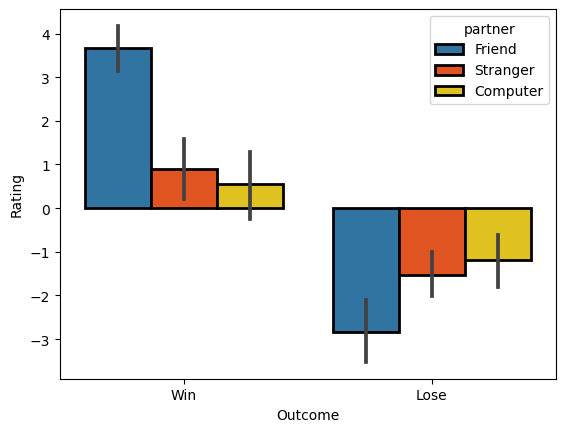

In [11]:
Trait = {0:'Win', 1:'Lose'}
partner = {3:'Friend',2:'Stranger',1:'Computer'}
srpr_df['partner']=srpr_df['Partner'].map(partner)
srpr_df['Outcome']=srpr_df['Trait'].map(Trait)
srpr_df
fig = sns.barplot(y='Rating',x='Outcome',hue='partner', data=srpr_df, palette=['tab:blue','orangered','gold'], edgecolor='black', linewidth = 2)
plt.show()
plt.savefig('../../../partner_ratings_anova.svg')

In [ ]:
df_psr

In [ ]:
df_psr['Win_F_S']=df_psr['Win-F-S']
ratings_lm = ols("Win_F_S ~ SU + RS + SU:RS", data=df_psr).fit()

sm.stats.anova_lm(ratings_lm, typ=2)
ratings_lm.summary()

In [ ]:
len(tmp_df)

In [13]:

df_TPJ = df[['sub','aTPJ_R-P_F-C', 'aTPJ_R-P_F-S','pTPJ_R-P_F-C','pTPJ_R-P_F-S']].copy()
df_TPJ.to_excel('../../../df_TPJ.xlsx', index = False)